<a href="https://colab.research.google.com/github/MikhailKuklin/time-series-analysis-forecasting/blob/main/notebooks/05_ts_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prophet is Facebook forecasting library

* additive model with the following components:
    * yearly using Fourier series
    * weekly using dummy variables
    * user-provided list of important holidays
* automatically detect changes in trend




In [1]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import libraries

from prophet import Prophet
import pandas as pd

In [3]:
# download data

df = pd.read_csv('espoo_2020_2022.csv',
                 parse_dates= {"date" : ["Year","m","d"]})


df.dropna(axis=0,inplace=True)

df = df.groupby(['date']).mean()

df.index.freq = "D"

df = df.reset_index()

df.columns = ['ds','y']

df.head()

,ds,y
0,2020-01-01,1.991667
1,2020-01-02,4.129167
2,2020-01-03,4.754167
3,2020-01-04,2.120833
4,2020-01-05,-1.712500


In [4]:
df.tail()

,ds,y
728,2021-12-29,-3.625000
729,2021-12-30,-2.208333
730,2021-12-31,0.091667
731,2022-01-01,-5.354167
732,2022-01-02,-10.500000


In [5]:
len(df)

733

In [6]:
# split into train and test sets

train = df.iloc[:728]
test = df.iloc[728:]

In [7]:
len(test)

5

In [8]:
# fit the model

m = Prophet()

m.fit(train)

18:46:08 - cmdstanpy - INFO - Chain [1] start processing
18:46:08 - cmdstanpy - INFO - Chain [1] done processing


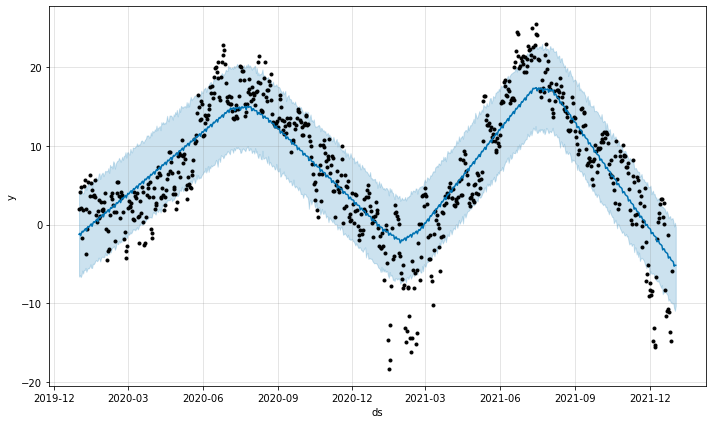

In [9]:
# forecasting

future = m.make_future_dataframe(periods=5,freq='D')

forecast = m.predict(future)

m.plot(forecast);

In [10]:
test.head()

,ds,y
728,2021-12-29,-3.625000
729,2021-12-30,-2.208333
730,2021-12-31,0.091667
731,2022-01-01,-5.354167
732,2022-01-02,-10.500000


In [11]:
test.tail()

,ds,y
728,2021-12-29,-3.625000
729,2021-12-30,-2.208333
730,2021-12-31,0.091667
731,2022-01-01,-5.354167
732,2022-01-02,-10.500000


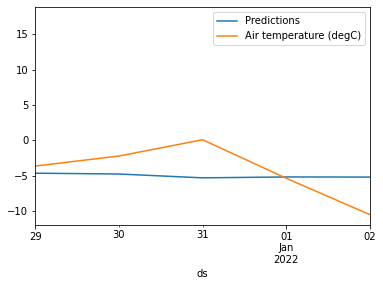

In [12]:
ax=forecast.plot(x='ds',y='yhat',label='Predictions')
test.plot(x='ds',y='y',label='Air temperature (degC)',ax=ax,legend=True,xlim=('2021-12-29','2022-01-02'));

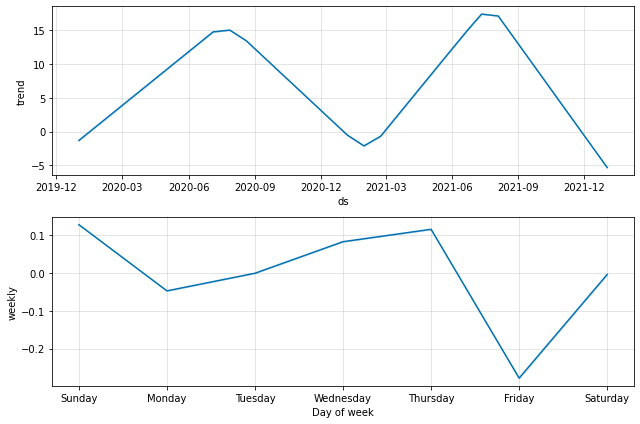

In [13]:
m.plot_components(forecast);

In [14]:
# evaluation

from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-5:]['yhat']

rmse(predictions,test['y'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


3.5992222759903827

In [15]:
# model diagnostics

from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

# Initial 1 years training period
initial = 365
initial = str(initial) + ' days'
# Fold every month
period = 30
period = str(period) + ' days'
# Forecast 1 month into the future
horizon = 30
horizon = str(horizon) + ' days'

In [16]:
# CV

df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

df_cv.head()

  0%|          | 0/12 [00:00<?, ?it/s]

18:46:11 - cmdstanpy - INFO - Chain [1] start processing
18:46:11 - cmdstanpy - INFO - Chain [1] done processing
18:46:13 - cmdstanpy - INFO - Chain [1] start processing
18:46:13 - cmdstanpy - INFO - Chain [1] done processing
18:46:15 - cmdstanpy - INFO - Chain [1] start processing
18:46:15 - cmdstanpy - INFO - Chain [1] done processing
18:46:18 - cmdstanpy - INFO - Chain [1] start processing
18:46:18 - cmdstanpy - INFO - Chain [1] done processing
18:46:22 - cmdstanpy - INFO - Chain [1] start processing
18:46:22 - cmdstanpy - INFO - Chain [1] done processing
18:46:25 - cmdstanpy - INFO - Chain [1] start processing
18:46:25 - cmdstanpy - INFO - Chain [1] done processing
18:46:29 - cmdstanpy - INFO - Chain [1] start processing
18:46:29 - cmdstanpy - INFO - Chain [1] done processing
18:46:33 - cmdstanpy - INFO - Chain [1] start processing
18:46:33 - cmdstanpy - INFO - Chain [1] done processing
18:46:37 - cmdstanpy - INFO - Chain [1] start processing
18:46:37 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-03,0.082145,-3.414459,3.776321,-2.658333,2021-01-02
1,2021-01-04,-0.278226,-3.799304,3.280629,-1.458333,2021-01-02
2,2021-01-05,-0.452819,-3.984317,2.891386,-2.975000,2021-01-02
3,2021-01-06,-0.135224,-3.706909,3.501522,-2.933333,2021-01-02
4,2021-01-07,-0.473801,-4.023947,3.049458,-1.075000,2021-01-02


In [17]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,52.469429,7.243578,6.270578,1.087075,0.828504,0.925195,0.361111
1,4 days,59.622963,7.721591,6.798637,1.057750,0.828504,0.945193,0.388889
2,5 days,63.735794,7.983470,7.044347,1.091554,0.760723,0.950272,0.388889
3,6 days,64.035453,8.002215,6.915354,0.939240,0.726922,0.898236,0.444444
4,7 days,65.828064,8.113450,6.821512,0.884926,0.620269,0.845824,0.444444
5,8 days,69.554470,8.339932,7.113920,0.922127,0.751440,0.872993,0.361111
6,9 days,84.604479,9.198069,8.049346,2.968772,0.805305,0.981712,0.222222
7,10 days,100.905935,10.045195,8.934997,3.545626,0.815171,1.065078,0.138889
8,11 days,106.646493,10.326979,9.302640,16.198281,0.806701,1.134128,0.111111
9,12 days,96.662857,9.831727,8.756408,14.395684,0.806701,1.091430,0.222222


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


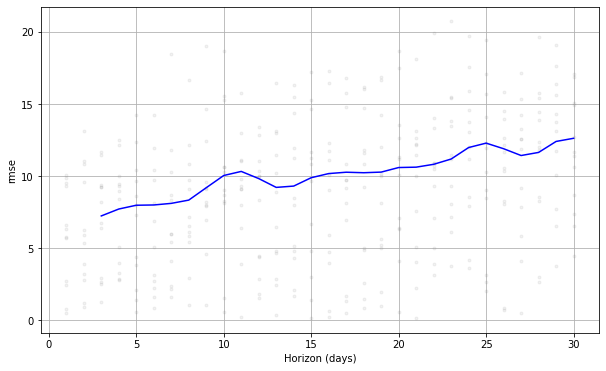

In [18]:
plot_cross_validation_metric(df_cv, metric='rmse');